In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
font_list_mac = fm.win32InstalledFonts()
print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

버전:  3.2.1
설치 위치:  C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\KIMDOHWAN\.matplotlib
캐시 위치:  C:\Users\KIMDOHWAN\.matplotlib
설정 파일 위치:  C:\Users\KIMDOHWAN\Anaconda3\envs\dacon\lib\site-packages\matplotlib\mpl-data\matplotlibrc
717
358
717
Malgun Gothic


In [3]:
mp_df = pd.read_excel("../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [4]:
yp_df = pd.read_excel("../data/moving_population/ingu_hour_yeungdeungpo.xlsx",sheet_name=0)

In [23]:
ingu_var = [x for x in mp_df.columns if '_ingu' in x]

In [24]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
# male_ingu_var
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
new_ingu_var

['under10',
 'under20',
 'under30',
 'under40',
 'under50',
 'under60',
 'under70',
 'under80',
 'upper80']

In [25]:
mp_df_select = mp_df[mp_df['dong_name']=='서교동']
mp_df_temp = mp_df_select.loc[:,['hour','dong_name']+ingu_var]
mp_df_select = mp_df_select.loc[:,['hour','dong_name']]

mp_df_male = mp_df_select.copy()
mp_df_female = mp_df_select.copy()

for idx,_var in enumerate(new_ingu_var):
    mp_df_select[_var] = mp_df_temp.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)
    mp_df_male[_var] = mp_df_temp[male_ingu_var[idx]]
    mp_df_female[_var] = mp_df_temp[female_ingu_var[idx]]

In [30]:
yp_df_select = yp_df[yp_df['dong_name']=='여의동']
yp_df_temp = yp_df_select.loc[:,['hour','dong_name']+ingu_var]
yp_df_select = yp_df_select.loc[:,['hour','dong_name']]

yp_df_male = yp_df_select.copy()
yp_df_female = yp_df_select.copy()
for idx,_var in enumerate(new_ingu_var):
    yp_df_select[_var] = yp_df_temp.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)
    yp_df_male[_var] = yp_df_temp[male_ingu_var[idx]]
    yp_df_female[_var] = yp_df_temp[female_ingu_var[idx]]

In [35]:
def get_time_age_heatmap_wrt4(df,df_male,df_female):
    analysis_time_stack = df.groupby('hour').sum()
    analysis_time_stack_male = df_male.groupby('hour').sum()
    analysis_time_stack_female = df_female.groupby('hour').sum()

    analysis_time_stack_heatmap = analysis_time_stack.transpose()
    analysis_time_stack_heatmap_male = analysis_time_stack_male.transpose()
    analysis_time_stack_heatmap_female = analysis_time_stack_female.transpose()

    analysis_time_heatmap_wrt4 = analysis_time_stack_heatmap.copy()
    analysis_time_heatmap_male_wrt4 = analysis_time_stack_heatmap_male.copy()
    analysis_time_heatmap_female_wrt4 = analysis_time_stack_heatmap_female.copy()
    annot_male_percent = analysis_time_heatmap_wrt4.copy()

    for idx in range(24):
        analysis_time_heatmap_wrt4[idx] = analysis_time_stack_heatmap[idx]-analysis_time_stack_heatmap[4]
        analysis_time_heatmap_male_wrt4[idx] = analysis_time_stack_heatmap_male[idx]-analysis_time_stack_heatmap_male[4]
        analysis_time_heatmap_female_wrt4[idx] = analysis_time_stack_heatmap_female[idx]-analysis_time_stack_heatmap_female[4]

        annot_male_percent[idx] = analysis_time_heatmap_male_wrt4[idx].abs()/(analysis_time_heatmap_male_wrt4[idx].abs()+analysis_time_heatmap_female_wrt4[idx].abs())
    annot_male_percent[4] = analysis_time_stack_heatmap_male[4]/analysis_time_stack_heatmap[4]
    return analysis_time_heatmap_wrt4,annot_male_percent

In [32]:
def define_custom_color():
    cmap0  = sns.diverging_palette(10, 240, sep=20, n=9)
    sns.palplot(cmap0)

    cmap  = sns.diverging_palette(10, 240, sep=20, n=9)
    cmap = [np.array([0.95,0.95,0.95,1.])] + cmap 
    cmap[5] = np.array([0.25,0.25,0.5,0.5])
    sns.palplot(cmap)
    return cmap

In [42]:
def draw_heatmap(heatmap,annot,cmap,bigger_than=3000,name='time_age_population_yp_wrt4_annot'):
    heatmap.describe()
    plt.figure(figsize=(12, 6))
    snsplt = sns.heatmap(heatmap,annot=annot,
                         cmap="YlGnBu", linewidths=.5)
    snsplt.set_xlabel("time")
    snsplt.set_ylabel("age")
    sns_fig = snsplt.get_figure()

    sns_fig.savefig(f'{name}.png')

    plt.figure(figsize=(12, 6))
    snsplt = sns.heatmap(annot, cmap=cmap,linewidths=.5)
    snsplt.set_xlabel("time")
    snsplt.set_ylabel("age")
    sns_fig = snsplt.get_figure()

    sns_fig.savefig(f'{name}_sex.png')

    annot_select = np.where(heatmap>bigger_than,annot,-0.11)
    plt.figure(figsize=(12, 6))
    snsplt = sns.heatmap(annot_select,cmap=cmap, linewidths=.5,vmax=1.)
    snsplt.set_xlabel("time")
    snsplt.set_ylabel("age")
    sns_fig = snsplt.get_figure()

    sns_fig.savefig(f'{name}_sex_select{bigger_than}.png')

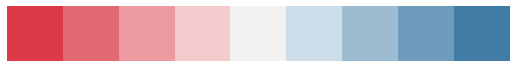

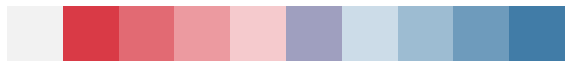

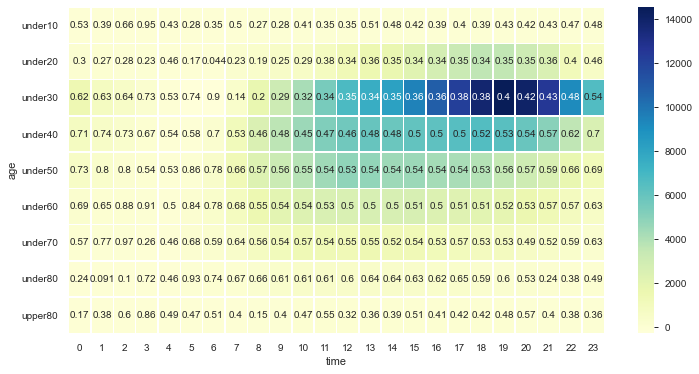

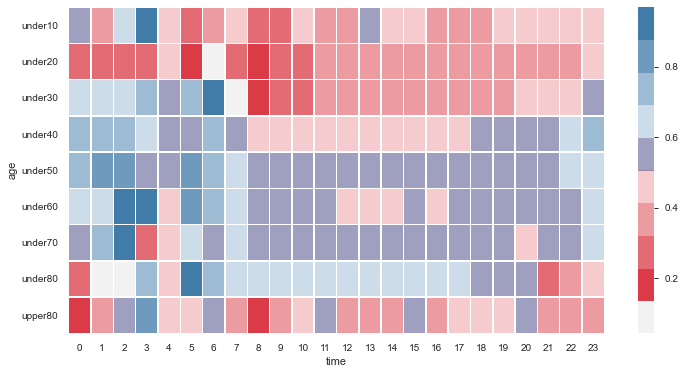

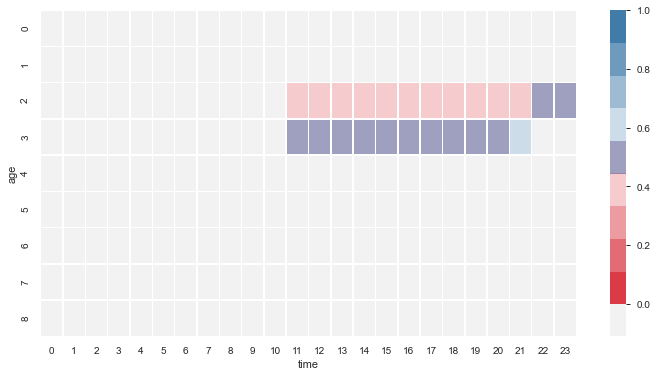

In [50]:
cmap =  define_custom_color()
mp_heatmap,mp_annot = get_time_age_heatmap_wrt4(mp_df_select,mp_df_male,mp_df_female)
mp_heatmap
draw_heatmap(mp_heatmap,mp_annot,cmap,5000,'time_age_heatmap_mp_wrt4_annot')

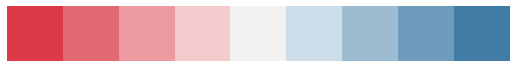

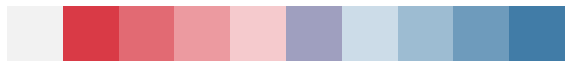

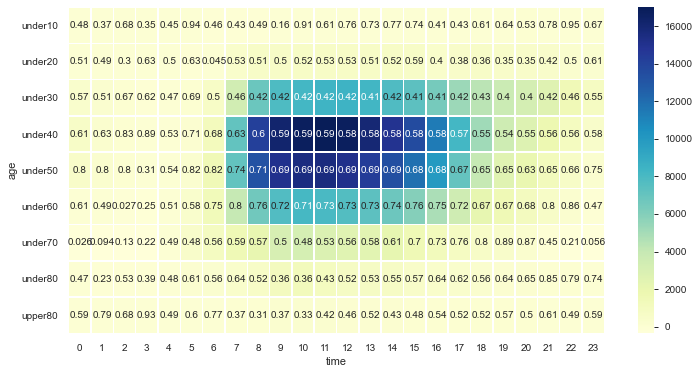

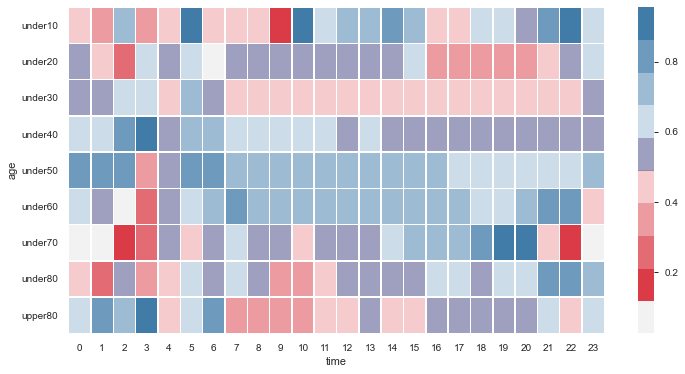

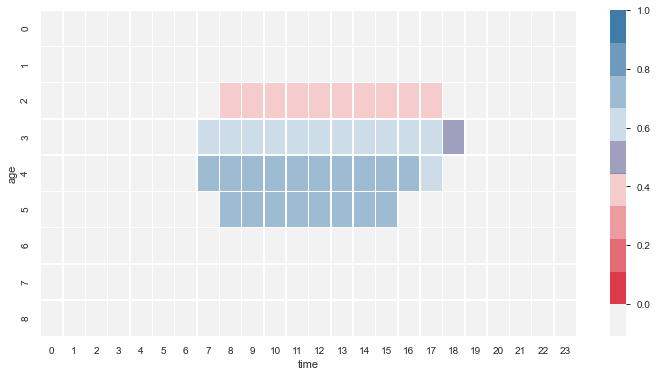

In [49]:
cmap =  define_custom_color()
yp_heatmap,yp_annot = get_time_age_heatmap_wrt4(yp_df_select,yp_df_male,yp_df_female)
yp_heatmap
draw_heatmap(yp_heatmap,yp_annot,cmap,5000,'time_age_heatmap_yp_wrt4_annot')